In [1]:
from astropy.table import Table
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from astropy.coordinates import SkyCoord

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_raw='../Datos/Raw/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'final_results.fits', format='fits')
print('Total number of galaxies with Ne ratios data: ',len(Ne_Sy))

Total number of galaxies with Ne ratios data:  97


In [4]:
Ne_Sy.show_in_browser()

## Preparing the data
### Separating the sample according the Ne ratio info:

For variable names, we will use the next convention:
- r1 = [Ne V] / [Ne II]
- r2 = [Ne V] / [Ne III]
- r3 = [Ne III] / [Ne II]

In [5]:
r1_Sy = Table(Ne_Sy)
r1_Sy.remove_rows(np.where(np.isnan(r1_Sy[r'[NeV]/[NeII]*']))[0])
r2_Sy = Table(Ne_Sy)
r2_Sy.remove_rows(np.where(np.isnan(r2_Sy[r'[NeV]/[NeIII]$^+$']))[0])
r3_Sy = Table(Ne_Sy)
r3_Sy.remove_rows(np.where(np.isnan(r3_Sy[r'[NeIII]/[NeII]$^-$']))[0])

### Separating the groups in Sy1 and Sy2  (according their classification in SIMBAD)

In [6]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

r1_Sy1 = r1_Sy[r1_Sy['otype']=='Sy1']
r1_Sy2 = r1_Sy[r1_Sy['otype']=='Sy2']
r1_SyG = r1_Sy[r1_Sy['otype']=='SyG']

r2_Sy1 = r2_Sy[r2_Sy['otype']=='Sy1']
r2_Sy2 = r2_Sy[r2_Sy['otype']=='Sy2']
r2_SyG = r2_Sy[r2_Sy['otype']=='SyG']

r3_Sy1 = r3_Sy[r3_Sy['otype']=='Sy1']
r3_Sy2 = r3_Sy[r3_Sy['otype']=='Sy2']
r3_SyG = r3_Sy[r3_Sy['otype']=='SyG']

---------

## Redshift Distribution

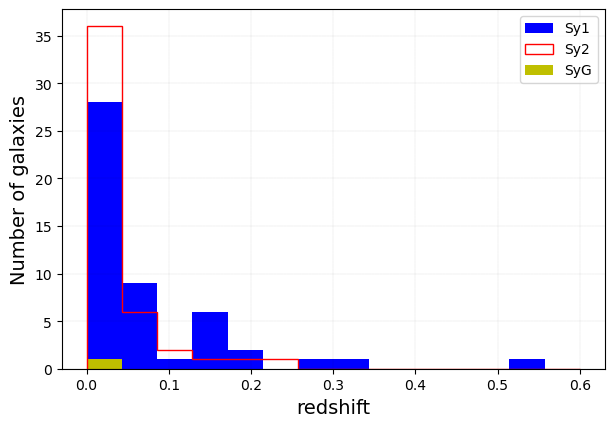

In [7]:
z_Sy1 = Ne_Sy1['redshift']
z_Sy2 = Ne_Sy2['redshift']
z_SyG = Ne_SyG['redshift']
bins_Sy = np.linspace(0.0,0.6,15)
plt.figure(figsize=(7,4.67))
plt.hist(z_Sy1, bins=bins_Sy,histtype='bar',color='b', label='Sy1')
plt.hist(z_Sy2, bins=bins_Sy,histtype='step',color='r', label='Sy2')
plt.hist(z_SyG, bins=bins_Sy,histtype='bar',color='y', label='SyG')
plt.xlabel('redshift',fontsize=14)
plt.ylabel(r'Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.05)
#plt.yscale('log')
plt.legend()

In [8]:
print('Min redshift value for Sy1:',np.round(min(z_Sy1),3),
      '. Max redshift value for Sy1:',np.round(max(z_Sy1),3))
print('Min redshift value for Sy2:',np.round(min(z_Sy2),3),
      '. Max redshift value for Sy2:',np.round(max(z_Sy2),3))
print('THe redshift value for SyG:',np.round(z_SyG,3))

Min redshift value for Sy1: 0.003 . Max redshift value for Sy1: 0.555
Min redshift value for Sy2: 0.006 . Max redshift value for Sy2: 0.22
THe redshift value for SyG: [0.025]


---------------------------

## Skymap

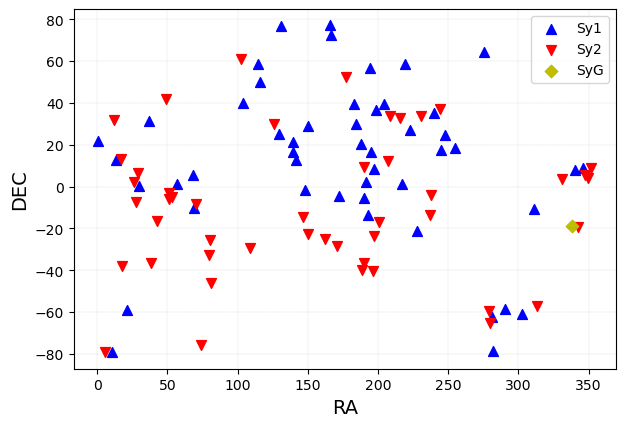

In [9]:
plt.figure(figsize=(7,4.67))
plt.scatter(Ne_Sy1['RA'], Ne_Sy1['DEC'],50,color='blue', marker = '^', label='Sy1')
plt.scatter(Ne_Sy2['RA'], Ne_Sy2['DEC'],50,color='red', marker = 'v', label='Sy2')
plt.scatter(Ne_SyG['RA'], Ne_SyG['DEC'],40,color='y', marker = 'D', label='SyG')
plt.xlabel(r'RA', fontsize=14)
plt.ylabel(r'DEC', fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.05)
plt.legend()
plt.show()

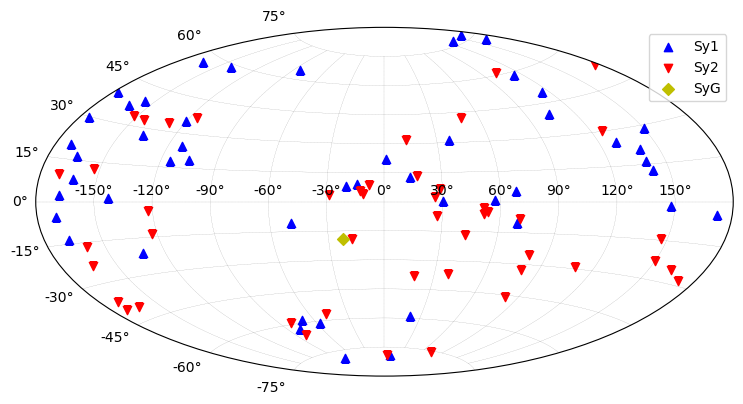

In [10]:
coordinates_Sy1= SkyCoord(ra=Ne_Sy1['RA'], dec=Ne_Sy1['DEC'],unit='deg',frame='icrs')
coordinates_Sy2= SkyCoord(ra=Ne_Sy2['RA'], dec=Ne_Sy2['DEC'],unit='deg',frame='icrs')
coordinates_SyG= SkyCoord(ra=Ne_SyG['RA'], dec=Ne_SyG['DEC'],unit='deg',frame='icrs')

plt.figure(figsize=(9,6))
plt.subplot(111, projection='aitoff')
plt.grid(color='k', linestyle='--', linewidth=0.08)
plt.scatter(coordinates_Sy1.ra.wrap_at('180d').radian, coordinates_Sy1.dec.radian,\
            color='blue', marker = '^', label='Sy1')
plt.scatter(coordinates_Sy2.ra.wrap_at('180d').radian, coordinates_Sy2.dec.radian,\
            color='red', marker = 'v', label='Sy2')
plt.scatter(coordinates_SyG.ra.wrap_at('180d').radian, coordinates_SyG.dec.radian,\
            color='y', marker = 'D', label='SyG')
plt.legend()
plt.show()

--------------------------

## Correlations between Neon Emision Lines:

In [11]:
r1_linreg = stats.linregress(r1_Sy[r'log_[NeV]*'],
                             r1_Sy[r'log_[NeII]*'])

r2_linreg = stats.linregress(r2_Sy[r'log_[NeV]$^+$'],
                             r2_Sy[r'log_[NeIII]$^+$'])

r3_linreg = stats.linregress(r3_Sy[r'log_[NeIII]$^-$'],
                             r3_Sy[r'log_[NeII]$^-$'])

$$RMS = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}$$


In [12]:
NeIIr1_pred = r1_linreg.slope*r1_Sy[r'log_[NeV]*']+r1_linreg.intercept
r1_rms = mean_squared_error(r1_Sy[r'log_[NeII]*'], NeIIr1_pred,squared=False)

NeIIIr2_pred = r2_linreg.slope*r2_Sy[r'log_[NeV]$^+$']+r2_linreg.intercept
r2_rms = mean_squared_error(r2_Sy[r'log_[NeIII]$^+$'], NeIIIr2_pred,squared=False)

NeIIr3_pred = r3_linreg.slope*r3_Sy[r'log_[NeIII]$^-$']+r3_linreg.intercept
r3_rms = mean_squared_error(r3_Sy[r'log_[NeII]$^-$'], NeIIr3_pred,squared=False)

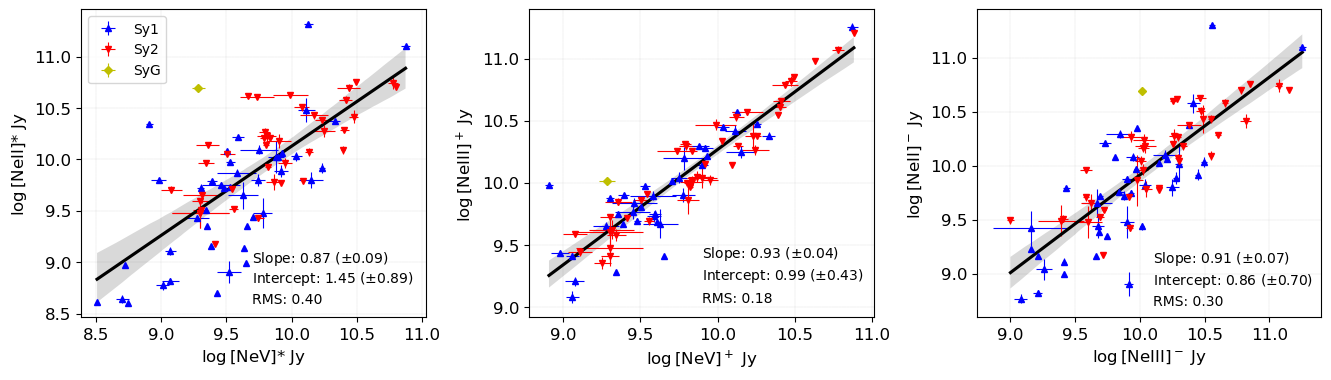

In [13]:
fontsize_labels = 12

plt.figure(figsize=(16,4))

plt.rc('xtick', labelsize=fontsize_labels)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize_labels)    # fontsize of the tick labels

ax1 = plt.subplot(131)
ax1.errorbar(r1_Sy1[r'log_[NeV]*'], r1_Sy1[r'log_[NeII]*'],
             r1_Sy1[r'log_[NeII]_err*'], r1_Sy1[r'log_[NeV]_err*'],
             markersize=5,elinewidth=0.8,fmt='b^',label='Sy1')
ax1.errorbar(r1_Sy2[r'log_[NeV]*'], r1_Sy2[r'log_[NeII]*'],
             r1_Sy2[r'log_[NeII]_err*'], r1_Sy2[r'log_[NeV]_err*'],
             markersize=5,elinewidth=0.8,fmt='rv',label='Sy2')
ax1.errorbar(r1_SyG[r'log_[NeV]*'], r1_SyG[r'log_[NeII]*'],
             r1_SyG[r'log_[NeII]_err*'], r1_SyG[r'log_[NeV]_err*'],
             markersize=4,elinewidth=0.8,fmt='yD',label='SyG')
sns.regplot(x=r'log_[NeV]*',y=r'log_[NeII]*',data=r1_Sy,marker='*',color='k',ax=ax1,scatter_kws={'s':2})
ax1.set_xlabel(r'$\log$[NeV]* Jy',fontsize=fontsize_labels)
ax1.set_ylabel(r'$\log$[NeII]* Jy',fontsize=fontsize_labels)
ax1.legend()
ax1.text(9.7,9.0,'Slope: %.2f' %r1_linreg.slope+
         ' ($\pm$%.2f'%r1_linreg.stderr+')',fontsize=10)
ax1.text(9.7,8.8,'Intercept: %.2f' %r1_linreg.intercept+
         ' ($\pm$%.2f'%r1_linreg.intercept_stderr+')',fontsize=10)
ax1.text(9.7,8.6,'RMS: %.2f' %r1_rms,fontsize=10)
ax1.grid(color='k', linestyle='--', linewidth=0.05)

ax2 = plt.subplot(132)
ax2.errorbar(r2_Sy1[r'log_[NeV]$^+$'], r2_Sy1[r'log_[NeIII]$^+$'],
             r2_Sy1[r'log_[NeIII]_err$^+$'], r2_Sy1[r'log_[NeV]_err$^+$'],
             markersize=5,elinewidth=0.8,fmt='b^',label='Sy1')
ax2.errorbar(r2_Sy2[r'log_[NeV]$^+$'], r2_Sy2[r'log_[NeIII]$^+$'],
             r2_Sy2[r'log_[NeIII]_err$^+$'], r2_Sy2[r'log_[NeV]_err$^+$'],
             markersize=5,elinewidth=0.8,fmt='rv',label='Sy2')
ax2.errorbar(r2_SyG[r'log_[NeV]$^+$'], r2_SyG[r'log_[NeIII]$^+$'],
             r2_SyG[r'log_[NeIII]_err$^+$'], r2_SyG[r'log_[NeV]_err$^+$'],
             markersize=4,elinewidth=0.8,fmt='yD',label='SyG')
sns.regplot(x=r'log_[NeV]$^+$',y=r'log_[NeIII]$^+$',data=r2_Sy,marker='*',color='k',ax=ax2,scatter_kws={'s':2})
ax2.set_xlabel(r'$\log$[NeV]$^+$ Jy',fontsize=fontsize_labels)
ax2.set_ylabel(r'$\log$[NeIII]$^+$ Jy',fontsize=fontsize_labels)
ax2.text(9.9,9.4,'Slope: %.2f' %r2_linreg.slope+
         ' ($\pm$%.2f'%r2_linreg.stderr+')',fontsize=10)
ax2.text(9.9,9.22,'Intercept: %.2f' %r2_linreg.intercept+
         ' ($\pm$%.2f'%r2_linreg.intercept_stderr+')',fontsize=10)
ax2.text(9.9,9.04,'RMS: %.2f' %r2_rms,fontsize=10)
ax2.grid(color='k', linestyle='--', linewidth=0.05)

ax3 = plt.subplot(133)
ax3.errorbar(r3_Sy1[r'log_[NeIII]$^-$'], r3_Sy1[r'log_[NeII]$^-$'],
             r3_Sy1[r'log_[NeII]_err$^-$'],r3_Sy1[r'log_[NeIII]_err$^-$'],
             markersize=5,elinewidth=0.8,fmt='b^',label='Sy1')
ax3.errorbar(r3_Sy2[r'log_[NeIII]$^-$'], r3_Sy2[r'log_[NeII]$^-$'],
             r3_Sy2[r'log_[NeII]_err$^-$'],r3_Sy2[r'log_[NeIII]_err$^-$'],
             markersize=5,elinewidth=0.8,fmt='rv',label='Sy2')
ax3.errorbar(r3_SyG[r'log_[NeIII]$^-$'], r3_SyG[r'log_[NeII]$^-$'],
             r3_SyG[r'log_[NeII]_err$^-$'],r3_SyG[r'log_[NeIII]_err$^-$'],
             markersize=4,elinewidth=0.8,fmt='yD',label='SyG')
sns.regplot(x=r'log_[NeIII]$^-$',y=r'log_[NeII]$^-$',data=r3_Sy,marker='*',color='k',ax=ax3,scatter_kws={'s':2})
ax3.set_xlabel(r'$\log$[NeIII]$^-$ Jy',fontsize=fontsize_labels)
ax3.set_ylabel(r'$\log$[NeII]$^-$ Jy',fontsize=fontsize_labels)
ax3.text(10.1,9.1,'Slope: %.2f' %r3_linreg.slope+
         ' ($\pm$%.2f'%r3_linreg.stderr+')',fontsize=10)
ax3.text(10.1,8.9,'Intercept: %.2f' %r3_linreg.intercept+
         ' ($\pm$%.2f'%r3_linreg.intercept_stderr+')',fontsize=10)
ax3.text(10.1,8.7,'RMS: %.2f' %r3_rms,fontsize=10)
ax3.grid(color='k', linestyle='--', linewidth=0.05)

plt.subplots_adjust(wspace=0.3) #Space between subplots

plt.show()

## Histogram Line Ratios:

<Figure size 2000x500 with 0 Axes>

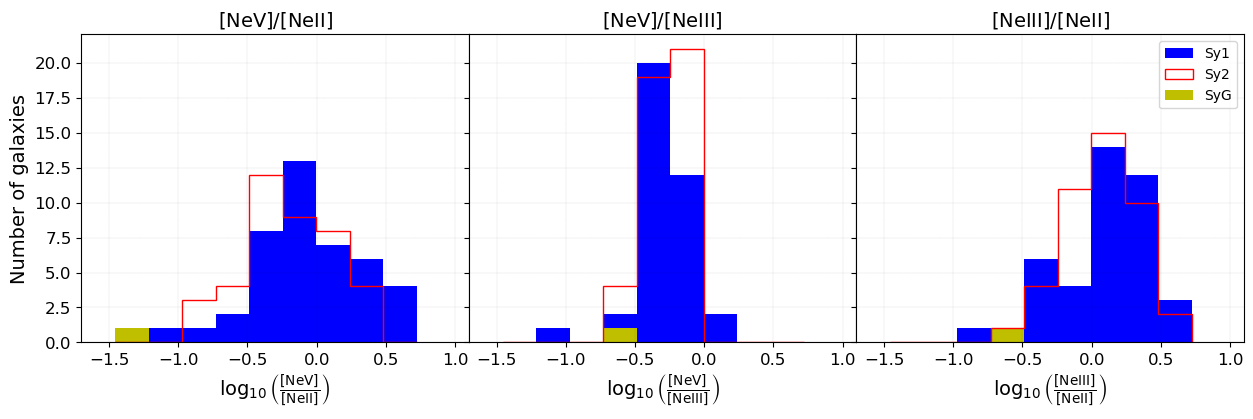

In [14]:
bins = np.linspace(min(r1_Sy['log_[NeV]/[NeII]']),max(r1_Sy['log_[NeV]/[NeII]']),10)#len(NeVNeII_Sy)
#bins = sturges(NeVNeII_Sy['log_[NeV]/[NeII]'])

plt.figure(figsize=(20,5))
fig, axs = plt.subplots(1,3,figsize=(15,4),sharey='row')

axs[0].hist(r1_Sy1['log_[NeV]/[NeII]'], bins=bins,color='b',histtype='bar',label='Sy1')
axs[0].hist(r1_Sy2['log_[NeV]/[NeII]'], bins=bins,color='r',histtype='step', label='Sy2')
axs[0].hist(r1_SyG['log_[NeV]/[NeII]'], bins=bins,color='y',histtype='bar', label='SyG')
axs[0].set_xlim(-1.7,1.1)
axs[0].set_xlabel(r'$\log_{10}\left(\frac{\mathregular{[NeV]}}{\mathregular{[NeII]}}\right)$',fontsize=14)
axs[0].set_ylabel('Number of galaxies',fontsize=14)
axs[0].set_title(r'$\mathregular{[NeV]} / \mathregular{[NeII]}$', fontsize=14)
#axs[0].legend()
axs[0].grid(color='k', linestyle='--', linewidth=0.05)

axs[1].hist(r2_Sy1['log_[NeV]/[NeIII]'], bins=bins,color='b',label='Sy1')
axs[1].hist(r2_Sy2['log_[NeV]/[NeIII]'], bins=bins,color='r',histtype='step', label='Sy2')
axs[1].hist(r2_SyG['log_[NeV]/[NeIII]'], bins=bins,color='y',histtype='stepfilled', label='SyG')
axs[1].set_xlim(-1.7,1.1)
axs[1].set_xlabel(r'$\log_{10}\left(\frac{\mathregular{[NeV]}}{\mathregular{[NeIII]}}\right)$',fontsize=14)
#axs[1].set_ylabel('Number of galaxies',fontsize=14)
axs[1].set_title(r'$\mathregular{[NeV]} / \mathregular{[NeIII]}$', fontsize=14)
axs[1].grid(color='k', linestyle='--', linewidth=0.05)
#axs[1].legend()

axs[2].hist(r3_Sy1['log_[NeIII]/[NeII]'], bins=bins,color='b',label='Sy1')
axs[2].hist(r3_Sy2['log_[NeIII]/[NeII]'], bins=bins,color='r',histtype='step', label='Sy2')
axs[2].hist(r3_SyG['log_[NeIII]/[NeII]'], bins=bins,color='y',histtype='bar', label='SyG')
axs[2].set_xlim(-1.7,1.1)
axs[2].set_xlabel(r'$\log_{10}\left(\frac{\mathregular{[NeIII]}}{\mathregular{[NeII]}}\right)$',fontsize=14)
#axs[2].set_ylabel('Number of galaxies',fontsize=14)
axs[2].set_title(r'$\mathregular{[NeIII]} / \mathregular{[NeII]}$', fontsize=14)
axs[2].grid(color='k', linestyle='--', linewidth=0.05)
axs[2].legend()

plt.subplots_adjust(wspace=0.0) #Space between subplots

plt.savefig(path_graphs+'histos_Ne_ratios_Sy.jpg')

---------------------------------------

## Final numbers

In [15]:
date_sample = 'Sep_02_2022'
simbad_sample_Sy = Table.read(path_raw+'SMB_'+date_sample+'_Sy_Samples'+'.vot',format='votable') 
NeIR_Sy = Table.read(path_raw+'Obj_Sy_Ne-IR_'+date_sample+'.vot',format='votable')
CIG_BadGalaxies = Table.read('../Datos/Complementary/CIGPhot_BadEnergyBalance.tbl', format='ascii')
CIG = Table.read(path_FINAL+'CIGPhot_EnergyBal_All.tbl', format='ascii')
CIG_results = Table.read(path_CIGALE_out+'resultsDBIC_All.fits', format='fits')

print('From the',len(simbad_sample_Sy),'Seyfert Galaxies from the SIMBAD sample,',len(NeIR_Sy),'have information\n\
of Neon lines ([NeII],[NeIII] or [NeV]).\n') 

print('After remove',len(CIG_BadGalaxies),'galaxies with bad energy balance coverage, the total of galaxies \n\
to model and fit their SEDs in CIGALE was',len(CIG),'.\n')

print(r'Cleaining the',len(CIG),'galaxies from CIGALE results of the galaxies with bad fittings \n\
and a bad constrained SFR,',len(CIG)-len(CIG_results),'galaxies \n\
was removed leaving a total of',len(CIG_results),'galaxies\n')

print('Of this',len(CIG_results),'galaxies, only',len(Ne_Sy),'have information from at least two different \n\
Neon spectral lines with the same bibcodes to calcule the spectral line ratios\n')

print('From the', len(Ne_Sy),'galaxies:',len(r1_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(r2_Sy),'galaxies have [NeV]/[NeIII] info and',len(r3_Sy),'galaxies have [NeIII]/[NeII] info')

From the 44270 Seyfert Galaxies from the SIMBAD sample, 303 have information
of Neon lines ([NeII],[NeIII] or [NeV]).

After remove 51 galaxies with bad energy balance coverage, the total of galaxies 
to model and fit their SEDs in CIGALE was 252 .

Cleaining the 252 galaxies from CIGALE results of the galaxies with bad fittings 
and a bad constrained SFR, 132 galaxies 
was removed leaving a total of 120 galaxies

Of this 120 galaxies, only 97 have information from at least two different 
Neon spectral lines with the same bibcodes to calcule the spectral line ratios

From the 97 galaxies: 84 galaxies have [NeV]/[NeII] info,
82 galaxies have [NeV]/[NeIII] info and 85 galaxies have [NeIII]/[NeII] info


-------------------------------------
## Notebook Info

In [16]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.12.1
IPython version      : 8.14.0

Compiler    : GCC 13.2.1 20231205 (Red Hat 13.2.1-6)
OS          : Linux
Release     : 6.6.6-200.fc39.x86_64
Machine     : x86_64
Processor   : 
CPU cores   : 16
Architecture: 64bit

Specific Python packages
astropy: 5.3.2

seaborn   : 0.13.0
scipy     : 1.11.1
matplotlib: 3.8.2
numpy     : 1.24.4

Watermark: 2.4.3

